In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "font.size": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    })

--------------------------------

# Results


### PINN: 

Network: [2, 100, 100, 100, 100, 2]

Num Param: 30.80k

Training time: 9080.9635

Error u: 1.456324e-03

Error v: 1.878211e-03

Error h: 1.098676e-03


### QRes-PINN (50): 
Network: [2, 50, 50, 50, 50, 2]

Num Param: 15.60k

Training time: 7530.9416

Error u: 1.379229e-03

Error v: 1.750997e-03

Error h: 1.058767e-03
<!-- 

### QRes-PINN (25): 
Network: [2, 25, 25, 25, 25, 2]

Num Param: 4.05k

Training time: 7673.6876

Error u: 6.050424e-03

Error v: 1.905713e-02

Error h: 6.876893e-03 -->

## Count Number of Parameters

In [2]:
l = [2, 100, 100, 100, 100, 2]
num_param = 0
for i in range(len(l)-1):
    num_param += l[i] * l[i+1] + l[i+1]
print("PINN Num params: %.2fk" % np.round(num_param / 1000, 2))

PINN Num params: 30.80k


In [3]:
l = [2, 50, 50, 50, 50, 2]
num_param = 0
for i in range(len(l)-1):
    num_param += l[i] * l[i+1] * 2 + l[i+1]
print("QRes Num params: %.2fk" % np.round(num_param / 1000, 2))

QRes Num params: 15.60k



--------------------------------

# Training Loss


In [6]:
pinn = np.load("loss/loss_PINNs.npy")
qres = np.load("loss/loss_QRes.npy")

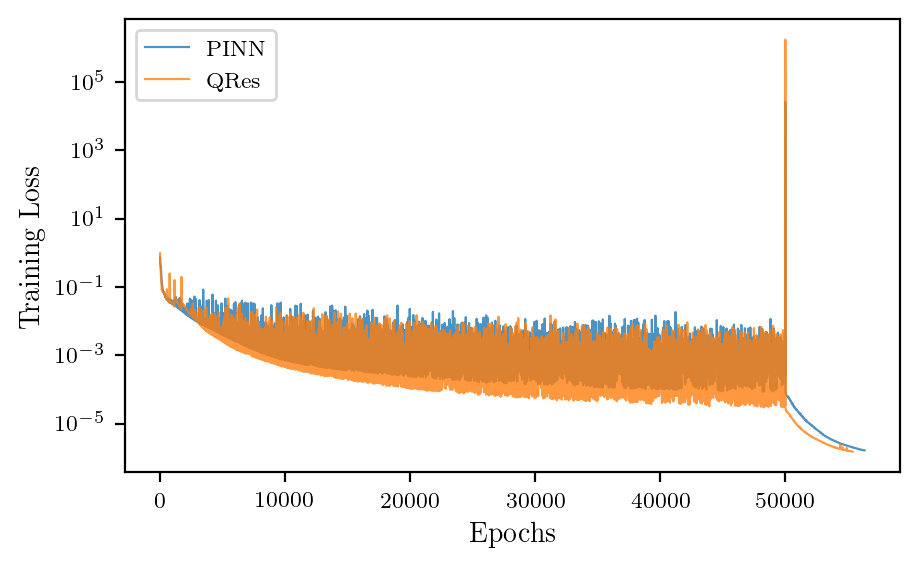

In [9]:
# loss is recorder 10 epochs for Adam/ per epoch for L-BFGS-B
x_pinn = np.concatenate((
    np.arange(0, 50000, 10), 
    np.arange(len(pinn) - 5000) + 50000
))
x_qres = np.concatenate((
    np.arange(0, 50000, 10), 
    np.arange(len(qres) - 5000) + 50000
))

plt.figure(dpi=200, figsize=(5, 3))
plt.yscale('log')
sns.lineplot(x=x_pinn, y=pinn, label='PINN', lw=0.8, alpha=0.8)
sns.lineplot(x=x_qres, y=qres, label='QRes', lw=0.8, alpha=0.8)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show()